## **Overview**:
Using the Titanic dataset, I explore the following machine learning classification algorithms and choose the best model accordingly.

0. Null Model
1. kNN
2. Boosted C5.0
3. Random Forest
4. Logistic Regression using regularization
5. Naive Bayes

## Data
The training and test datasets are used from the titanic R package. Note that the titanic_train has the Survived variable and the titanic_train dataset does not. Therefore, I selected a training and validation dataset from titanic_train to evaluate the models.

In [52]:
# Install packages
install.packages("titanic")
install.packages("pacman")
install.packages("randomForest")
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [53]:
# Load libraries and necessary packages
library(titanic)
library(randomForest)
library(pacman)
library(pROC)
p_load(titanic, rsample, dplyr, kknn, tidyverse, janitor, naniar, DataExplorer, tidymodels, tidyverse, C50, klaR, agua, discrim)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘inum’, ‘partykit’



C50 installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘R.cache’, ‘e1071’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’



klaR installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘RCurl’, ‘h2o’



agua installed

Installing

In [6]:
# Load data
data(titanic_train)
data(titanic_test)

In [7]:
# Preview training data
head(titanic_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [8]:
#Preview testing data
head(titanic_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


## Data Cleaning and Exploration

In [9]:
# Clean names for training data
titanic_train <- titanic_train %>%
  clean_names()
head(titanic_train)

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [10]:
# Factor
titanic_train2 <- titanic_train %>% dplyr::select(-passenger_id, -name, -ticket, -cabin) %>%
  mutate(
    survived = as_factor(survived),
    pclass = as_factor(pclass),
    sex = as_factor(sex),
    embarked = as_factor(embarked)
  )

head(titanic_train2)

,survived,pclass,sex,age,sib_sp,parch,fare,embarked
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,NA,0,0,8.4583,Q


In [11]:
# Clean names for testing data
titanic_test <- titanic_test %>% clean_names()
head(titanic_test)

,passenger_id,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [12]:
# Factor
titanic_test2 <- titanic_test %>% select(-passenger_id, -name, -ticket, -cabin) %>%
  mutate(
    pclass = as_factor(pclass),
    sex = as_factor(sex),
    embarked = as_factor(embarked)
  )

head(titanic_test2)

,pclass,sex,age,sib_sp,parch,fare,embarked
,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,3,male,34.5,0,0,7.8292,Q
2,3,female,47.0,1,0,7.0000,S
3,2,male,62.0,0,0,9.6875,Q
4,3,male,27.0,0,0,8.6625,S
5,3,female,22.0,1,1,12.2875,S
6,3,male,14.0,0,0,9.2250,S


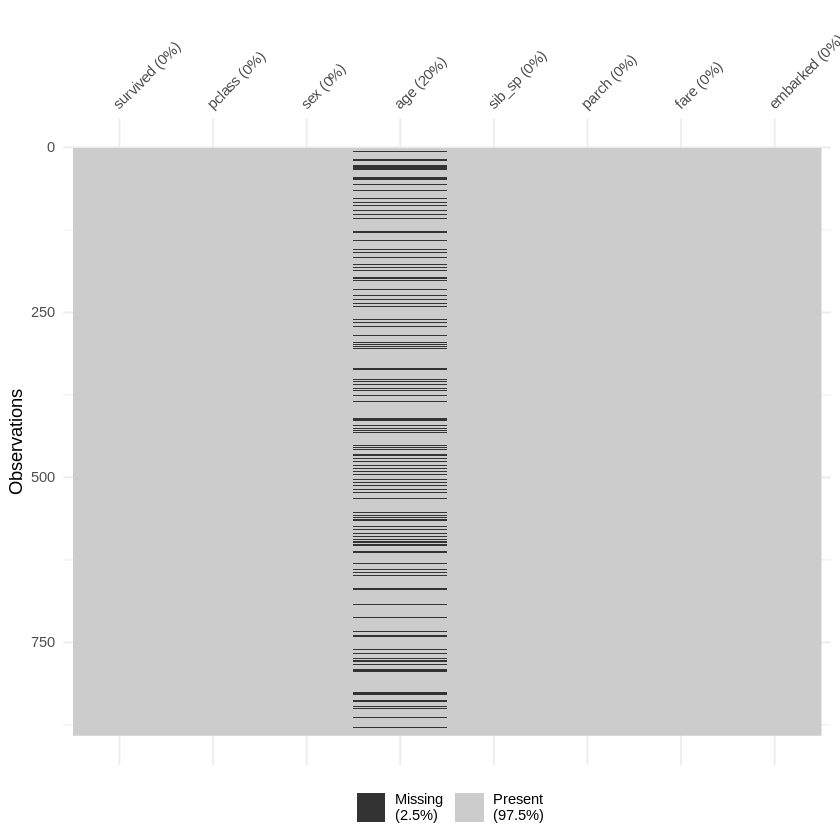

In [13]:
# Check missingness map
vis_miss(titanic_train2)

## Model Building

### Model 0: Null Model

From below, we have the null model. We take the training set data and split it 80% and test data 20%. We train the data used in the split training dataset. We use step_nzv() to remove the age column because of low variability and use step_meanimpute() to fill in cells that are missing the mean of column. The null model results in an accuracy of 0.6145.

In [71]:
# Summarize y-variable
titanic_train2 %>% group_by(survived) %>%
  summarize(n = n()) %>%
  mutate(freq = n / sum(n))

survived,n,freq
<fct>,<int>,<dbl>
0,549,0.6161616
1,342,0.3838384


In [72]:
# Set seed for reproducibility
set.seed(123)

# Split dataset 80% in training dataset
train <- initial_split(titanic_train2, prop = 0.8)
train

<Training/Testing/Total>
<712/179/891>

In [73]:
# Train data
train %>%
  training() %>%
  head()

,survived,pclass,sex,age,sib_sp,parch,fare,embarked
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,1,3,male,44.0,0,0,7.9250,S
2,0,1,male,47.0,0,0,38.5000,S
3,0,2,male,30.0,0,0,13.0000,S
4,0,3,male,40.5,0,0,7.7500,Q
5,1,1,female,44.0,0,0,27.7208,C
6,0,2,male,31.0,1,1,37.0042,C


In [74]:
# Recipe for preprocessing
train_recipe <- training(train) %>%
  recipe(survived ~.) %>%
  step_rm(pclass, sex, embarked) %>%
  step_nzv(all_predictors()) %>%
  step_impute_mean(age) %>%
  prep()

glimpse(train_recipe)

List of 12
 $ var_info      : tibble [8 × 4] (S3: tbl_df/tbl/data.frame)
  ..$ variable: chr [1:8] "pclass" "sex" "age" "sib_sp" ...
  ..$ type    :List of 8
  ..$ role    : chr [1:8] "predictor" "predictor" "predictor" "predictor" ...
  ..$ source  : chr [1:8] "original" "original" "original" "original" ...
 $ term_info     : tibble [5 × 4] (S3: tbl_df/tbl/data.frame)
  ..$ variable: chr [1:5] "age" "sib_sp" "parch" "fare" ...
  ..$ type    :List of 5
  ..$ role    : chr [1:5] "predictor" "predictor" "predictor" "predictor" ...
  ..$ source  : chr [1:5] "original" "original" "original" "original" ...
 $ steps         :List of 3
  ..$ :List of 6
  .. ..$ terms   :List of 3
  .. .. ..- attr(*, "class")= chr [1:2] "quosures" "list"
  .. ..$ role    : logi NA
  .. ..$ trained : logi TRUE
  .. ..$ removals: Named chr [1:3] "pclass" "sex" "embarked"
  .. .. ..- attr(*, "names")= chr [1:3] "pclass" "sex" "embarked"
  .. ..$ skip    : logi FALSE
  .. ..$ id      : chr "rm_NoTnz"
  .. ..- attr

In [75]:
# Tidy
tidy(train_recipe)

number,operation,type,trained,skip,id
<int>,<chr>,<chr>,<lgl>,<lgl>,<chr>
1,step,rm,TRUE,FALSE,rm_NoTnz
2,step,nzv,TRUE,FALSE,nzv_2R7sW
3,step,impute_mean,TRUE,FALSE,impute_mean_LkPqg


In [76]:
# Apply recipe so age variable to be complete
train_testing <- train_recipe %>%
  bake(testing(train))

train_testing

age,sib_sp,parch,fare,survived
<dbl>,<int>,<int>,<dbl>,<fct>
22.00000,1,0,7.2500,0
26.00000,0,0,7.9250,1
54.00000,0,0,51.8625,0
58.00000,0,0,26.5500,1
14.00000,0,0,7.8542,0
29.91726,0,0,13.0000,1
34.00000,0,0,13.0000,1
29.91726,0,0,7.2250,0
19.00000,3,2,263.0000,0


In [77]:
# Prepare the training dataset using the recipe
train_training <- juice(train_recipe)
train_training

age,sib_sp,parch,fare,survived
<dbl>,<int>,<int>,<dbl>,<fct>
44.00000,0,0,7.9250,1
47.00000,0,0,38.5000,0
30.00000,0,0,13.0000,0
40.50000,0,0,7.7500,0
44.00000,0,0,27.7208,1
31.00000,1,1,37.0042,0
29.00000,1,0,21.0000,0
29.91726,0,0,30.5000,1
18.00000,0,0,13.0000,0


In [78]:
# Null
titanic_null <- null_model() %>%
  set_engine("parsnip") %>%
  set_mode("classification") %>%
  fit(survived ~ ., data = train_training)

predict(titanic_null, train_training)

.pred_class
<fct>
0
0
0
0
0
0
0
0
0


In [79]:
titanic_null %>%
  predict(train_testing) %>%
  bind_cols(train_testing)

.pred_class,age,sib_sp,parch,fare,survived
<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
0,22.00000,1,0,7.2500,0
0,26.00000,0,0,7.9250,1
0,54.00000,0,0,51.8625,0
0,58.00000,0,0,26.5500,1
0,14.00000,0,0,7.8542,0
0,29.91726,0,0,13.0000,1
0,34.00000,0,0,13.0000,1
0,29.91726,0,0,7.2250,0
0,19.00000,3,2,263.0000,0


In [80]:
# Average of survivors in training dataset
mean(as.numeric(titanic_train$survived), na.rm = TRUE)

[1] 0.3838384

In [81]:
# Generate predictions from test set
titanic_null %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  metrics(truth = survived, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6145251
kap,binary,0.0000000


In [82]:
# Confusion matrix
titanic_null %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  conf_mat(truth = survived, estimate = .pred_class)

          Truth
Prediction   0   1
         0 110  69
         1   0   0

### Model 1: KNN

From the code below, we apply a KNN model. Normalization was first applied as a preprocessing step. The results was an accuracy of 0.7150, which is an improvement over the null model.

In [83]:
# Recipe for preprocessing with normalization
train_recipe <- recipe(survived ~ ., data = train) %>%
  step_rm(pclass, sex, embarked) %>%
  step_nzv(all_predictors()) %>%
  step_impute_mean(age) %>%
  step_normalize(all_numeric_predictors()) %>%
  prep()

In [84]:
# Prepare the training dataset using the recipe
train_training <- juice(train_recipe)

In [85]:
# Set up model
titanic_knn <- nearest_neighbor(neighbors = 11) %>%
  set_engine("kknn") %>%
  set_mode("classification") %>%
  fit(survived ~ ., data = train_training)

predict(titanic_knn, train_training)

.pred_class
<fct>
0
0
0
0
0
0
0
1
0


In [86]:
titanic_knn %>%
  predict(train_testing) %>%
  bind_cols(train_testing)

.pred_class,age,sib_sp,parch,fare,survived
<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
0,22.00000,1,0,7.2500,0
0,26.00000,0,0,7.9250,1
1,54.00000,0,0,51.8625,0
1,58.00000,0,0,26.5500,1
0,14.00000,0,0,7.8542,0
0,29.91726,0,0,13.0000,1
0,34.00000,0,0,13.0000,1
0,29.91726,0,0,7.2250,0
1,19.00000,3,2,263.0000,0


In [87]:
# Predict accuracy
titanic_knn %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  metrics(truth = survived, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7150838
kap,binary,0.4279717


In [88]:
# Confusion matrix
titanic_knn %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  conf_mat(truth = survived, estimate = .pred_class)

          Truth
Prediction  0  1
         0 75 16
         1 35 53

### Model 2: Boosted C5.0

The C5.0 model results in an accuracy of 0.4245, which is our worst performing model so far.

In [89]:
# Set up model
titanic_C50 <- boost_tree(trees = 20) %>%
  set_engine("C5.0") %>%
  set_mode("classification") %>%
  fit(survived ~ ., data = train_training)

predict(titanic_C50, train_training)

.pred_class
<fct>
0
0
0
0
0
0
0
0
0


In [90]:
# Set up model
titanic_C50 <- boost_tree(trees = 20) %>%
  set_engine("C5.0") %>%
  set_mode("classification") %>%
  fit(survived ~ ., data = train_training)

predict(titanic_C50, train_training)

.pred_class
<fct>
0
0
0
0
0
0
0
0
0


In [91]:
titanic_C50 %>%
  predict(train_testing) %>%
  bind_cols(train_testing)

.pred_class,age,sib_sp,parch,fare,survived
<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,22.00000,1,0,7.2500,0
1,26.00000,0,0,7.9250,1
1,54.00000,0,0,51.8625,0
1,58.00000,0,0,26.5500,1
1,14.00000,0,0,7.8542,0
1,29.91726,0,0,13.0000,1
1,34.00000,0,0,13.0000,1
1,29.91726,0,0,7.2250,0
0,19.00000,3,2,263.0000,0


In [92]:
# Predict accuracy
titanic_C50 %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  metrics(truth = survived, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.42458101
kap,binary,0.02927394


In [93]:
# Confusion matrix
titanic_C50 %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  conf_mat(truth = survived, estimate = .pred_class)

          Truth
Prediction  0  1
         0 12  5
         1 98 64

### Model 3: Random Forest

 The random forest model results in an accuracy of 0.6201, which is a slight improvement over our null model, but lower performing than the KNN model.

In [94]:
# Set up model
titanic_rf <- rand_forest(mode = "classification") %>%
  set_engine("randomForest") %>%
  fit(survived ~ ., data = train_training)

predict(titanic_rf, train_training)

.pred_class
<fct>
0
0
0
0
1
0
0
1
0


In [95]:
titanic_rf %>%
  predict(train_testing) %>%
  bind_cols(train_testing)

.pred_class,age,sib_sp,parch,fare,survived
<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
0,22.00000,1,0,7.2500,0
0,26.00000,0,0,7.9250,1
0,54.00000,0,0,51.8625,0
0,58.00000,0,0,26.5500,1
0,14.00000,0,0,7.8542,0
0,29.91726,0,0,13.0000,1
0,34.00000,0,0,13.0000,1
0,29.91726,0,0,7.2250,0
0,19.00000,3,2,263.0000,0


In [96]:
# Predict accuracy
titanic_rf %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  metrics(truth = survived, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.62011173
kap,binary,0.03058299


In [97]:
# Confusion matrix
titanic_rf %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  conf_mat(truth = survived, estimate = .pred_class)

          Truth
Prediction   0   1
         0 108  66
         1   2   3

### Model 4: Logistic Regression using regularization

The logistic regression model results in an accuracy of 0.6536, which is our second best performing model so far, after KNN.



In [98]:
# Set up model
titanic_lg <- logistic_reg(mode = "classification") %>%
  set_engine("glm") %>%
  fit(survived ~ ., data = train_training)

predict(titanic_lg, train_training)

.pred_class
<fct>
0
0
0
0
0
0
0
0
0


In [99]:
titanic_lg %>%
  predict(train_testing) %>%
  bind_cols(train_testing)

.pred_class,age,sib_sp,parch,fare,survived
<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
0,22.00000,1,0,7.2500,0
0,26.00000,0,0,7.9250,1
1,54.00000,0,0,51.8625,0
1,58.00000,0,0,26.5500,1
1,14.00000,0,0,7.8542,0
1,29.91726,0,0,13.0000,1
1,34.00000,0,0,13.0000,1
0,29.91726,0,0,7.2250,0
1,19.00000,3,2,263.0000,0


In [100]:
# Predict accuracy
titanic_lg %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  metrics(truth = survived, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6536313
kap,binary,0.3465615


In [101]:
# Confusion matrix
titanic_lg %>%
  predict(train_testing) %>%
  bind_cols(train_testing) %>%
  conf_mat(truth = survived, estimate = .pred_class)

          Truth
Prediction  0  1
         0 57  9
         1 53 60

### Model 5: Naive Bayes

The Naive Bayes model results in an accuracy of 0.5418, an improvement over the null model but not a good model compared to the other previous models.

In [102]:
# Set up model
titanic_nb <- naive_Bayes(Laplace = 1) %>%
  set_engine("klaR") %>%
  set_mode("classification") %>%
  fit(survived ~ ., data = train_training)

predict(titanic_nb, train_training)

.pred_class
<fct>
0
0
0
0
0
1
0
0
0


In [107]:
suppressWarnings( # suppress warnings
  titanic_nb %>%
    predict(train_testing) %>%
    bind_cols(train_testing)
)

.pred_class,age,sib_sp,parch,fare,survived
<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,22.00000,1,0,7.2500,0
0,26.00000,0,0,7.9250,1
1,54.00000,0,0,51.8625,0
1,58.00000,0,0,26.5500,1
0,14.00000,0,0,7.8542,0
1,29.91726,0,0,13.0000,1
1,34.00000,0,0,13.0000,1
1,29.91726,0,0,7.2250,0
1,19.00000,3,2,263.0000,0


In [108]:
# Predict accuracy
suppressWarnings( # suppress warnings
  titanic_nb %>%
    predict(train_testing) %>%
    bind_cols(train_testing) %>%
    metrics(truth = survived, estimate = .pred_class)
)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5418994
kap,binary,0.1755785


In [109]:
# Confusion matrix
suppressWarnings( # suppress warnings
  titanic_nb %>%
    predict(train_testing) %>%
    bind_cols(train_testing) %>%
    conf_mat(truth = survived, estimate = .pred_class)
)


          Truth
Prediction  0  1
         0 37  9
         1 73 60

## Final Results

The model with the highest accuracy was the KNN model. The below are the results of the KNN model fitted on the full titanic_train dataset.

In [111]:
# Remove missing values from full titanic train dataset
df <- na.omit(titanic_train2)

In [112]:
# Recipe for preprocessing with normalization
train_recipe <- recipe(survived ~ ., data = df) %>%
  step_rm(pclass, sex, embarked) %>%
  step_nzv(all_predictors()) %>%
  step_impute_mean(age) %>%
  step_normalize(all_numeric_predictors()) %>%
  prep()

In [113]:
# Prepare the training dataset using the recipe
train_training <- juice(train_recipe)

In [114]:
# Set up model
final_model <- nearest_neighbor(neighbors = 11) %>%
  set_engine("kknn") %>%
  set_mode("classification") %>%
  fit(survived ~ ., data = train_training)

In [115]:
# Make predictions
predict(final_model, df)

.pred_class
<fct>
0
1
0
1
0
1
1
0
1
